# Data Preprocessing


In [41]:
import pandas as pd
from fastai.vision.all import *
import os

from rembg import remove
from PIL import Image 


## Labeling the Datasets
Read the name of the file to get the number of fingers in the image. For example, "*_0L.png" means the image has 0 finger and left hand, "1R.png" means the image has 1 finger and right hand, and so on.

In [2]:
# Label the images
def label_func(f): return f.split('_')[1][0]

## Data Storage


In [3]:
data_path = '../data/fingers/'

# Create a dataframe with the image names and labels
train_file_list = os.listdir(os.path.join(data_path, 'train'))
train_data = pd.DataFrame({'file': train_file_list, 'fingers': [label_func(f) for f in train_file_list]})

# # test_file_list = os.listdir(os.path.join(data_path, 'test'))
# # test_data = pd.DataFrame({'file': test_file_list, 'fingers': [label_func(f) for f in test_file_list]})


In [69]:
# Create a dataloader
data = ImageDataLoaders.from_df(train_data, 
                                fn_col='file', 
                                label_col='fingers', 
                                path=os.path.join(data_path, 'train'), 
                                valid_pct=0.2, 
                                seed=42, 
                                batch_tfms=[*aug_transforms(), Normalize.from_stats(mean, std)])

NameError: name 'mean' is not defined

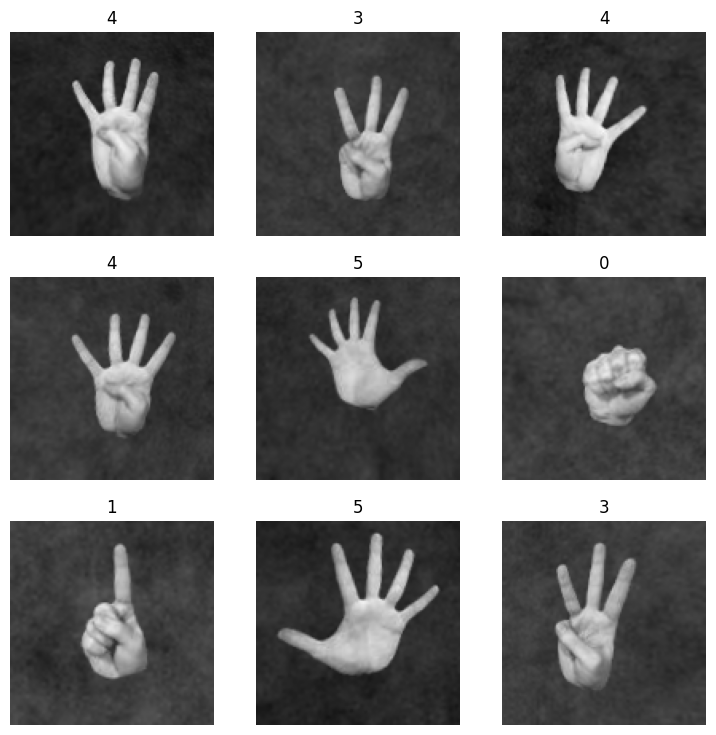

In [5]:
data.show_batch()

## Train the Model

In [23]:
learner = vision_learner(data, resnet18, metrics=accuracy)

c:\Users\dusti\anaconda3\envs\rt_webcam_ct\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


SuggestedLRs(valley=0.0014454397605732083)


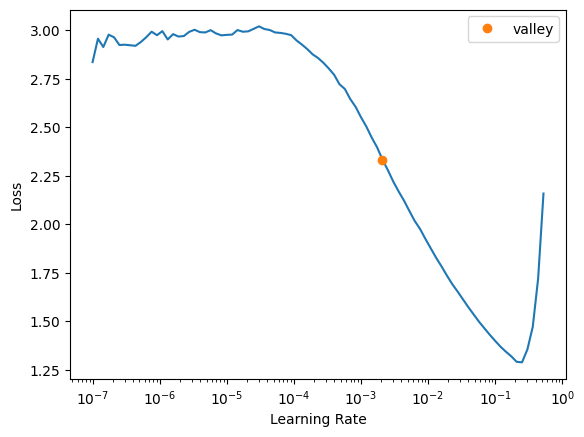

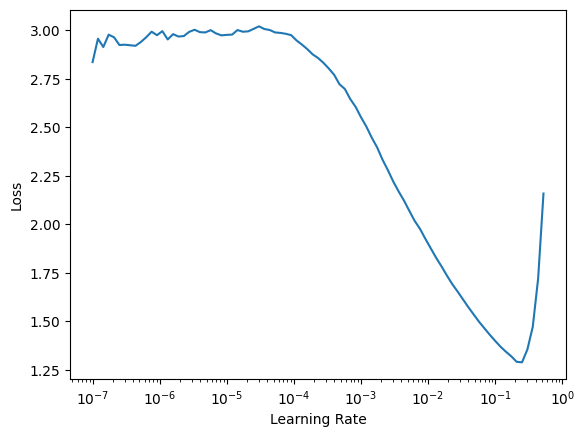

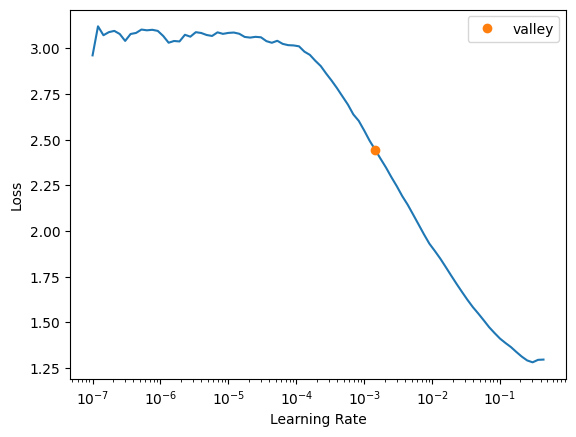

In [32]:
learner.lr_find()

learner.recorder.plot_lr_find()
# Print the learning rate
print(learner.lr_find())

In [33]:
lr_to_use = 0.0014454397605732083
# Fit the model with the chosen learning rate
learner.fit_one_cycle(5, lr_max=lr_to_use)

c:\Users\dusti\anaconda3\envs\rt_webcam_ct\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.121139,0.020382,0.991898,21:50
1,0.023489,0.001335,0.999306,26:25
2,0.007466,0.000083,1.000000,21:56
3,0.008322,0.000007,1.000000,22:39
4,0.001622,0.000005,1.000000,18:20


In [7]:
# learner.fine_tune(epochs=2)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.017323,0.000994,0.999537,42:41
1,0.002642,0.000051,1.000000,36:46


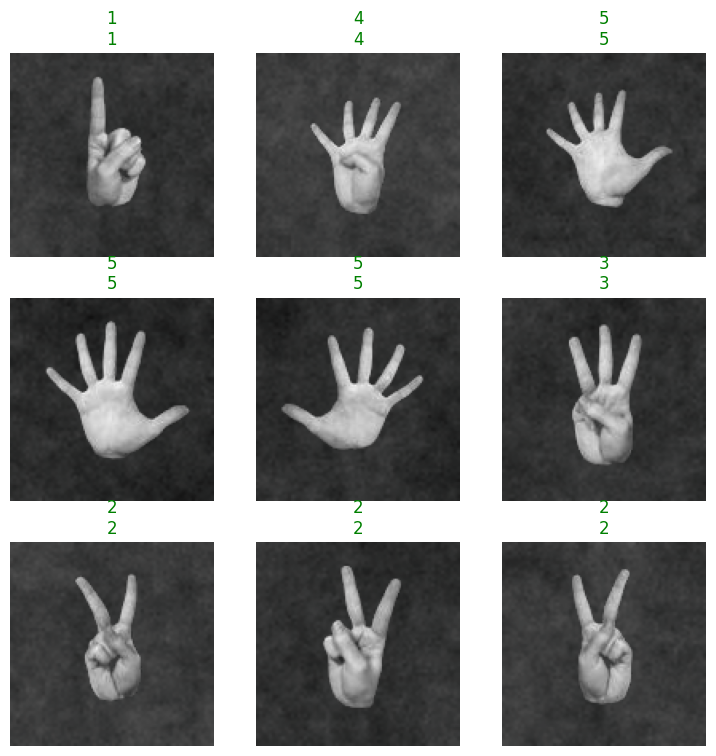

In [34]:
learner.show_results()

In [35]:
# Save the model
learner.export(os.path.join(os.getcwd(), f'../models/fingers_{lr_to_use}.pkl'))

## Predicting the Test Set


In [47]:
# Load the model
predicter = load_learner(os.path.join(os.getcwd(), f'../models/fingers_{lr_to_use}.pkl'))

In [37]:
# Convert image to grayscale
def convert_to_grayscale(img):
    return img.convert('L')

In [38]:
# Resize image to 128x128
def resize_image(img):
    return img.resize((128, 128))

In [68]:
# Get test data
# test_file_list = os.listdir(os.path.join(data_path, 'test'))
# test_df = pd.DataFrame({'file': test_file_list, 'fingers': [label_func(f) for f in test_file_list]})

img_1 = Image.open(os.path.join(data_path, 'test/1_1L.jpg'))
img_1 = remove(img_1)
img_1 = convert_to_grayscale(img_1) 

img_2 = Image.open(os.path.join(data_path, 'test/1_2L.jpg'))
img_2 = remove(img_2)
img_2 = convert_to_grayscale(img_2)

img_3 = Image.open(os.path.join(data_path, 'test/1_3L.jpg'))
img_3 = remove(img_3)
img_3 = convert_to_grayscale(img_3)

img_4 = Image.open(os.path.join(data_path, 'test/1_4L.jpg'))
img_4 = remove(img_4)
img_4 = convert_to_grayscale(img_4)

img_5 = Image.open(os.path.join(data_path, 'test/1_5L.jpg'))
img_5 = remove(img_5)
img_5 = convert_to_grayscale(img_5)



In [67]:
print(predicter.predict(img_1))
print(predicter.predict(img_2))
print(predicter.predict(img_3))
print(predicter.predict(img_4))
print(predicter.predict(img_5))

c:\Users\dusti\anaconda3\envs\rt_webcam_ct\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('0', tensor(0), tensor([0.4826, 0.4369, 0.0179, 0.0228, 0.0038, 0.0361]))


('1', tensor(1), tensor([0.2974, 0.6380, 0.0097, 0.0070, 0.0052, 0.0427]))


('1', tensor(1), tensor([0.2101, 0.6331, 0.0155, 0.0320, 0.0163, 0.0929]))


('1', tensor(1), tensor([0.2170, 0.5444, 0.0930, 0.0423, 0.0069, 0.0964]))


('1', tensor(1), tensor([0.1495, 0.6349, 0.0294, 0.0109, 0.0019, 0.1734]))


('2', tensor(2), tensor([0.2425, 0.1230, 0.4157, 0.1759, 0.0014, 0.0416]))

In [ ]:
# Load the test data
test_loader = ImageDataLoaders.from_df(test_data, fn_col='file', label_col='fingers', path=os.path.join(data_path, 'test'), item_tfms=Resize(128))

In [ ]:
# Get predictions
test_dl = learner.dls.test_dl(test_loader)
preds = learner.get_preds(dl=test_dl)

# Get the accuracy
accuracy(preds[0], preds[1])


AssertionError: Expected an input of type in 
  - <class 'pandas.core.series.Series'>
  - <class 'pathlib.Path'>
  - <class 'str'>
  - <class 'torch.Tensor'>
  - <class 'numpy.ndarray'>
  - <class 'bytes'>
  - <class 'PIL.Image.Image'>
  - <class 'fastai.vision.core.PILImage'>
 but got <class 'fastai.data.core.TfmdDL'>